# Imports

In [24]:


import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import keras.utils as np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import applications
from keras import optimizers

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

# Data load

## Train data

In [2]:
# Load training data frame
#train_data_path = '../../dat/train.csv'
train_data_path = 'C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/train.csv'
all_train_df = pd.read_csv(train_data_path)
print('Training DataFrame loaded')
all_train_df.head(3)

Training DataFrame loaded


,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284


In [3]:
y = all_train_df.loc[all_train_df.id =='cacf8152e2d2ae60']['landmark_id']
#all_train_df.loc[all_train_df.id =='cacf8152e2d2ae60', ['landmark_id']]

In [4]:
int(y)

4676

In [5]:
W = 48
L = 48
N_CH = 3

In [6]:
def load_data(directory, df):

    
    x = []
    y = []
    # Loop on all jpg files
    for img_file in os.listdir(directory):

        try:
            img = Image.open(os.path.join(directory, img_file))
            img = np.array(img.resize((L, W), Image.ANTIALIAS))
            img = np.resize(img, (L,W,N_CH))
            x.append(img)
            id_str = os.path.splitext(img_file)[0]
            y.append(int(df.loc[df.id ==id_str]['landmark_id']))
        except:
            print('Cannot load img file')
    x = np.array(x)
    y = np.array(y)
    #y = np.expand_dims(y, axis=1)
    return x, y

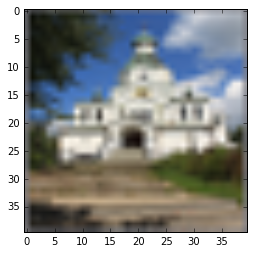

In [7]:
##jpgfile = Image.open(all_train_df.iloc[0]['id']+'.jpg')
#jpgfile = Image.open(open("../../dat/all_train_raw/0a58358a2afd3e4e.jpg", 'rb'))

#img = Image.open(os.path.abspath("../../dat/all_train_raw/fb3bd13be65b86b0.jpg"))
img = Image.open(os.path.abspath("C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/train/000a1fcfa0a7a9ac.jpg"))

#jpgfile.show()
#plt.imshow(img)

#img


w = 40
h = 40
n_ch = 3
#img = img.resize((w,h), Image.ANTIALIAS)
img = np.array(img.resize((w, h), Image.ANTIALIAS))
#img = img.resize((w,h))
img = np.resize(img, (w,h,n_ch))

img = np.array(img)
img.shape
plt.imshow(img)

In [8]:
# Train



#directory = '../../dat/all_train_raw'
directory = 'C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/train'
x, y = load_data(directory, all_train_df)
print(x.shape)
print(y.shape)

Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
(1663, 48, 48, 3)
(1663,)


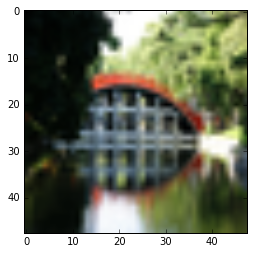

In [9]:
img = x[1]
img.shape
plt.imshow(img)

In [10]:
'''
directory = 'C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/train'
x = []
y = []
# Loop on all jpg files
for img_file in os.listdir(directory):

    try:
        img = Image.open(os.path.join(directory, img_file))
        #img = np.array(img.resize((L,W)))
        img = np.resize(img, (L,W,3))
        x.append(img)
        id_str = os.path.splitext(img_file)[0]
        y.append(int(all_train_df.loc[df.id ==id_str]['landmark_id']))
    except:
        print('Cannot load img file')

'''

"\ndirectory = 'C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/train'\nx = []\ny = []\n# Loop on all jpg files\nfor img_file in os.listdir(directory):\n\n    try:\n        img = Image.open(os.path.join(directory, img_file))\n        #img = np.array(img.resize((L,W)))\n        img = np.resize(img, (L,W,3))\n        x.append(img)\n        id_str = os.path.splitext(img_file)[0]\n        y.append(int(all_train_df.loc[df.id ==id_str]['landmark_id']))\n    except:\n        print('Cannot load img file')\n\n"

In [11]:
'''
x = np.array(x)
y = np.array(y)
'''

'\nx = np.array(x)\ny = np.array(y)\n'

## Test data

In [12]:
test_data_path = 'C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/test.csv'
test_df = pd.read_csv(test_data_path)
print('Test DataFrame loaded')
test_df.head(3)

Test DataFrame loaded


,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...


In [13]:
directory = 'C:/Non_valeo/Research/PostDoc/Kaggle/GLand/dat/test'
x_test, y_test = load_data(directory, test_df)
print(x_test.shape)
print(y_test.shape)

Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load i

## Random split train into train/val

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape

(1330, 48, 48, 3)

In [16]:
x_val.shape

(333, 48, 48, 3)

In [17]:
#y1 = np.reshape(y, (len(y),1))
'''
y = np.expand_dims(y, axis=1)
y.shape
'''

'\ny = np.expand_dims(y, axis=1)\ny.shape\n'

In [18]:
#num_classes = max(y[:,0])
num_classes = max(y) + 1
num_classes


14951

In [19]:
# Convert class vectors to binary class matrices.
#num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test /= 255
x_val /= 255

## Histo of classes in train/va/test

# Model

In [20]:
## Top model pre-train

In [21]:
## Top model + top base layers fine tune

In [30]:
img_width = W
img_height = L

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network

#input_shape = (3,img_width,img_height)
VGG_model = applications.VGG16(weights='imagenet', include_top=False, input_shape = (img_width,img_height,N_CH))
print('Model loaded.')
print(VGG_model.summary())
'''
model = Sequential()
for layer in VGG_model.layers:
    model.add(layer)
'''
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
#top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Flatten(input_shape=VGG_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_classes, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
#top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
#model.add(top_model)
model = Model(inputs= VGG_model.input, outputs= top_model(VGG_model.output))

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
print(model.summary())

Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0      

In [ ]:
data_augmentation = True

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        samples_per_epoch=len(x_train),
                        validation_data=(x_val, y_val),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/50


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=50, steps_per_epoch=83, workers=4, validation_data=(array([[[...)`


83/83 [==============================] - 93s - loss: 7.1044e-04 - acc: 0.9999 - val_loss: 7.1034e-04 - val_acc: 0.9999
Epoch 2/50
83/83 [==============================] - 83s - loss: 7.1051e-04 - acc: 0.9999 - val_loss: 7.1034e-04 - val_acc: 0.9999
Epoch 3/50
 8/83 [=>............................] - ETA: 51s - loss: 7.1029e-04 - acc: 0.9999

In [ ]:
# Predict on test

# Prepare submission